## Data Exploration for various Gamma, Epsilon, and Epsilon Decay Values
This data was generated iteratively by running various combination of these 3 values through 100 trails on the Smartcab Agent using Q-Learning.  Originally I was going to include alpha values as well, but changed to a time dependent alpha decay so that Q_hat converges to Q. 

In [14]:
import os
import pandas as pd

data_frame_dict = {}
index = 0 

# get csv files 
for csv_file in os.listdir('./csv_files/'):
    if csv_file.startswith('gamma_'): #skip over other files from single iteration 
        pass
    elif csv_file.endswith(".csv"):
        data_frame_dict[index] = pd.DataFrame.from_csv('./csv_files/' + csv_file)
        index += 1

# check dataframes were loaded in dictionary
data_frame_dict[0].head()

,Gamma,Epsilon,Epsilon Decay,Start Location,Desination,Deadline,Successful?
Trial,,,,,,,
Trial 1.0,0.3,0.5,0.9,"(1, 1)","(3, 5)",30,No
Trial 1.1,0.3,0.5,0.9,"(8, 1)","(8, 5)",20,Yes
Trial 1.2,0.3,0.5,0.9,"(2, 5)","(7, 4)",30,No
Trial 1.3,0.3,0.5,0.9,"(7, 1)","(4, 5)",35,No
Trial 1.4,0.3,0.5,0.9,"(4, 4)","(7, 2)",25,Yes


In [15]:
from itertools import product

def success_frame_dictionary(dictionary):
    success_frame_dict = {}
    
    # get lists of every unique Gamma, Epsilon and Epsilon Decay value
    gamma_values = [round(x, 2) for x in data_frame_dict[0]['Gamma'].unique()]
    epsilon_values = [round(x, 2) for x in data_frame_dict[0]['Epsilon'].unique()]
    epsilon_decay_values = [round(x, 2) for x in data_frame_dict[0]['Epsilon Decay'].unique()]
    
    # columns to track 
    columns_to_track = ['Gamma', 'Epsilon', 'Epsilon Decay']

    for key, dframe in dictionary.iteritems():
        
        # create a new empty dataframe 
        success_frame = pd.DataFrame()
        
        # for every combination of Gamma, Epsilon, and Epsilon Decay Count Successes 
        for combination in product(gamma_values, epsilon_values, epsilon_decay_values):
            num_successes =  len(dframe[(dframe['Gamma'] == combination[0]) & (dframe['Epsilon'] == combination[1]) & 
                                (dframe['Epsilon Decay'] == combination[2]) & (dframe['Successful?'] == 'Yes')])
        
            # initalize empty row 
            row = [] 
            row.append(combination[0]) # append gamma
            row.append(combination[1]) # append epsilon
            row.append(combination[2]) # append epsilon decay
            row.append(num_successes) # append number of successes 
            success_frame = success_frame.append(pd.Series(row), ignore_index=True) #add row to success frame 

        columns_string = 'Gamma Epsilon Epsilon_Decay Successes_' + str(key)
        success_frame.columns = columns_string.split(' ') # add column names 
        success_frame_dict[key] = success_frame
    
    return success_frame_dict

success_frame_dict = success_frame_dictionary(data_frame_dict)
success_frame_dict[0].head()

,Gamma,Epsilon,Epsilon_Decay,Successes_0
0,0.3,0.5,0.90,80.0
1,0.3,0.5,0.93,96.0
2,0.3,0.5,0.96,68.0
3,0.3,0.5,0.99,95.0
4,0.4,0.5,0.90,93.0


In [16]:
def index_dataframes(dictionary):
    indexed_dframe_dict = {}
    for key, dframe in dictionary.iteritems():
        dframe_indexed = dframe.set_index(['Gamma', 'Epsilon', 'Epsilon_Decay'])
        indexed_dframe_dict[key] = dframe_indexed
        
    return indexed_dframe_dict

indexed_dataframe_dict = index_dataframes(success_frame_dict)
indexed_dataframe_dict[0].head()

Successes_0
Gamma Epsilon Epsilon_Decay             
0.3   0.5     0.90                  80.0
              0.93                  96.0
              0.96                  68.0
              0.99                  95.0
0.4   0.5     0.90                  93.0

### Plotting the Data 

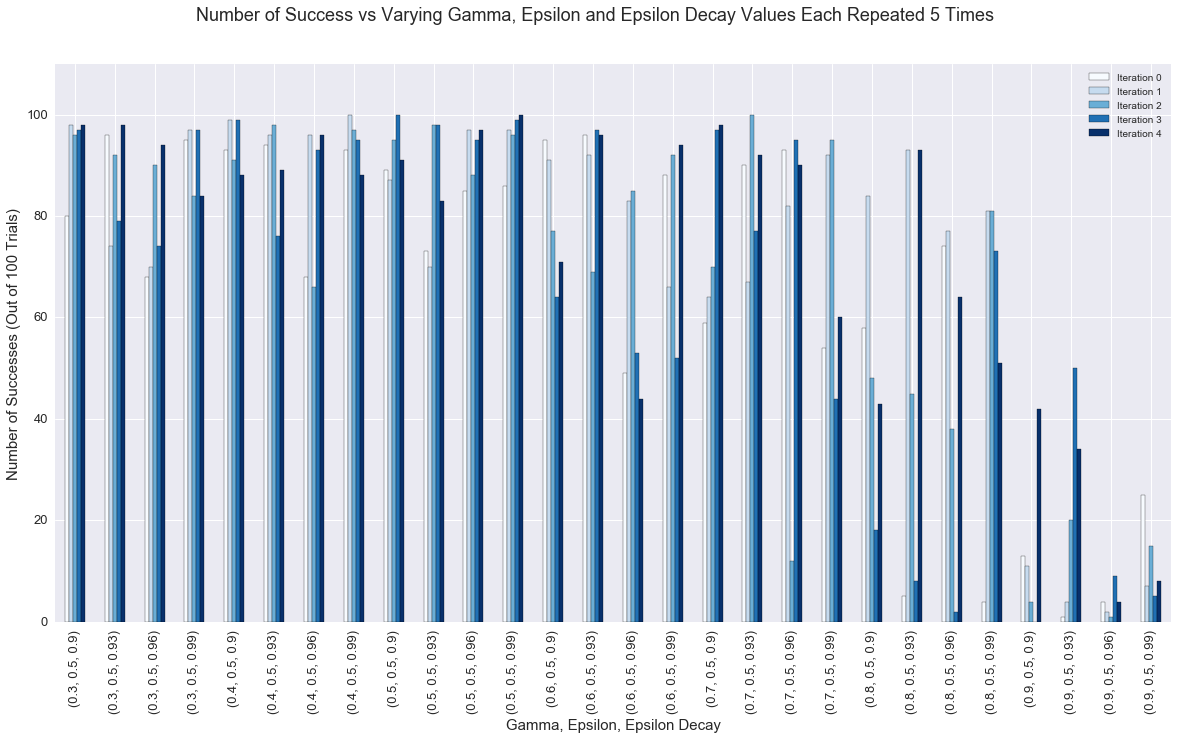

In [184]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['figure.figsize'] = (20, 10) 
sns.set_style('darkgrid')

for key, dataframe in indexed_dataframe_dict.iteritems():
    if key == 0:
        joined_frame = dataframe
    else:
        joined_frame = joined_frame.join(dataframe)
        
joined_frame.columns = ['Iteration 0', 'Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4']

joined_frame.plot(kind='bar', ylim=(0,110), colormap='Blues')
plt.ylabel('Number of Successes (Out of 100 Trials)', fontsize=15)
plt.yticks(fontsize=13)
plt.xlabel('Gamma, Epsilon, Epsilon Decay', fontsize=15)
plt.xticks(fontsize=13)
plt.suptitle('Number of Success vs Varying Gamma, Epsilon and Epsilon Decay Values Each Repeated 5 Times', fontsize=18)

Performance seems to be related to the Gamma Value.  Once it's above 0.5 it starts to drop off. 

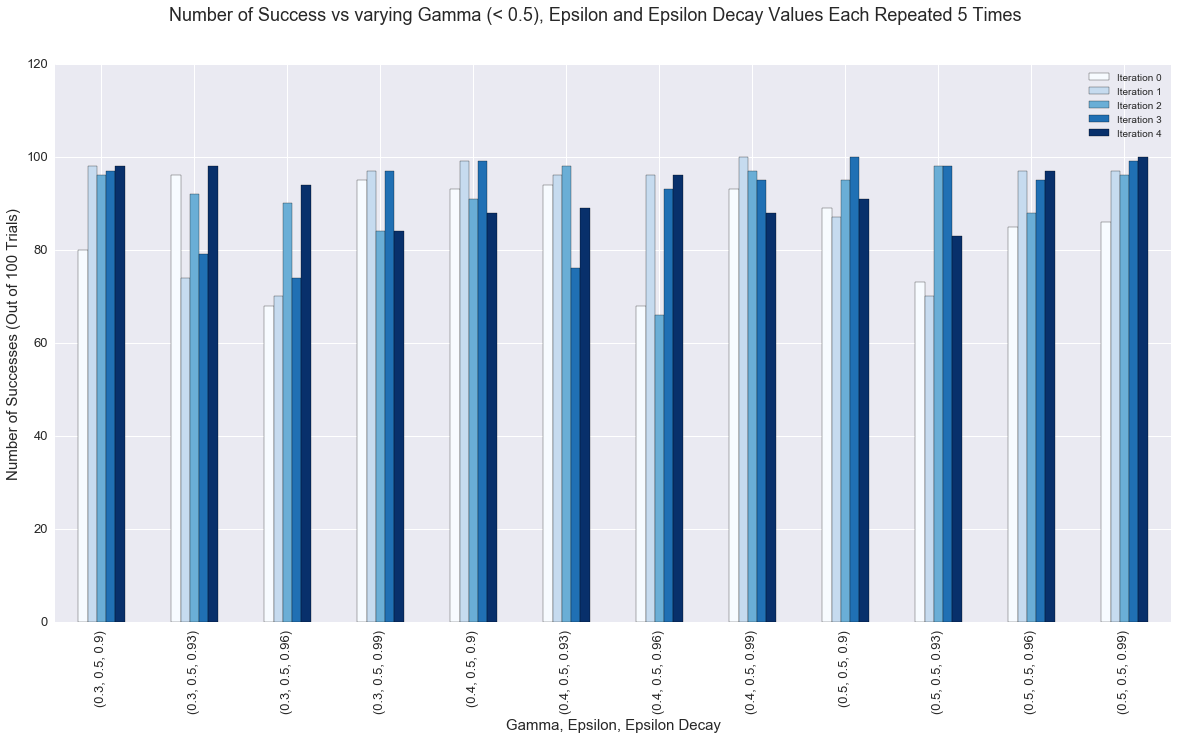

In [149]:
#unindex for slicing
unindexed = joined_frame.reset_index()
gamma_small = unindexed[unindexed['Gamma'] <= 0.5]
gamma_small_indexed = gamma_small.set_index(['Gamma', 'Epsilon', 'Epsilon_Decay'])
gamma_small_indexed.head()

gamma_small_indexed.plot(kind='bar', ylim=(0,120), colormap='Blues')
plt.ylabel('Number of Successes (Out of 100 Trials)', fontsize=15)
plt.yticks(fontsize=13)
plt.xlabel('Gamma, Epsilon, Epsilon Decay', fontsize=15)
plt.xticks(fontsize=13)
plt.suptitle('Number of Success vs varying Gamma (< 0.5), Epsilon and Epsilon Decay Values Each Repeated 5 Times', fontsize=18)

### Find the maximum from this smaller set of Gamma values 

In [88]:
# find the max average 
gamma_small_indexed.head()
averages = (gamma_small['Iteration 0'] + gamma_small['Iteration 1'] + gamma_small['Iteration 2'] + 
    gamma_small['Iteration 3'] + gamma_small['Iteration 4']) / 5
max_index = averages.idxmax()

# max average and index 
print 'The max success rate is: {:.2f} at index: {}\n'.format(averages[max_index], max_index)

# what's the associated Gamma, Epsilon and Epsilon Decay Values 
print 'The best combination is: Gamma = {:.2f}, Epsilon = {:.2f}, Epsilon_Decay = {:.2f}'.format(
        float(gamma_small.iloc[[max_index]]['Gamma']), 
        float(gamma_small.iloc[[max_index]]['Epsilon']), 
        float(gamma_small.iloc[[max_index]]['Epsilon_Decay'])
    )

The max success rate is: 95.60 at index: 11

The best combination is: Gamma = 0.50, Epsilon = 0.50, Epsilon_Decay = 0.99


### Box plots vs individual variables

#### Gamma vs Successes Plot

In [133]:
# stack the data frame 
stacked_frame = joined_frame.stack()
stacked_frame = stacked_frame.reset_index()
columns = ['Gamma', 'Epsilon', 'Epsilon_Decay', 'Iteration', 'Successes']
stacked_frame.columns = columns
stacked_frame.head()

,Gamma,Epsilon,Epsilon_Decay,Iteration,Successes
0,0.3,0.5,0.9,Iteration 0,80.0
1,0.3,0.5,0.9,Iteration 1,98.0
2,0.3,0.5,0.9,Iteration 2,96.0
3,0.3,0.5,0.9,Iteration 3,97.0
4,0.3,0.5,0.9,Iteration 4,98.0


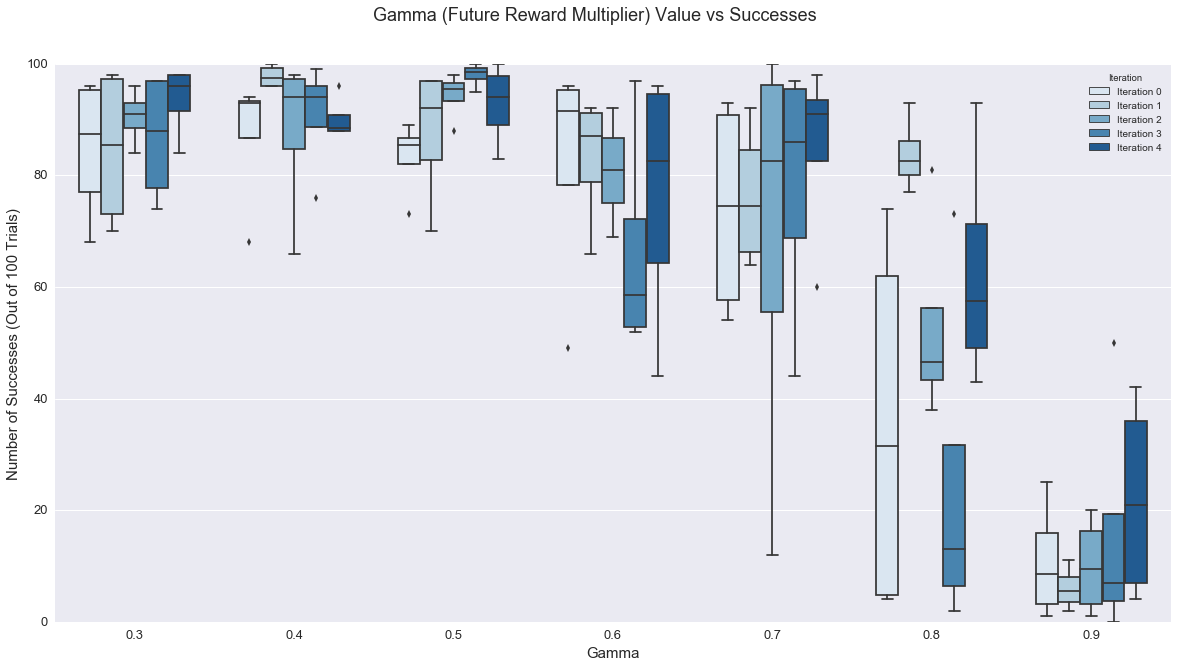

In [163]:
# plot Gamma values effects 
plt.rcParams['figure.figsize'] = (20, 10)
plt.suptitle('Gamma (Future Reward Multiplier) Value vs Successes', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax = sns.boxplot(y=stacked_frame['Successes'], x=stacked_frame['Gamma'], hue=stacked_frame['Iteration'], palette="Blues", width=0.7)
plt.ylabel('Number of Successes (Out of 100 Trials)', fontsize=15)
plt.xlabel('Gamma', fontsize=15)
plt.show()

### Epsilon Decay vs Successes 

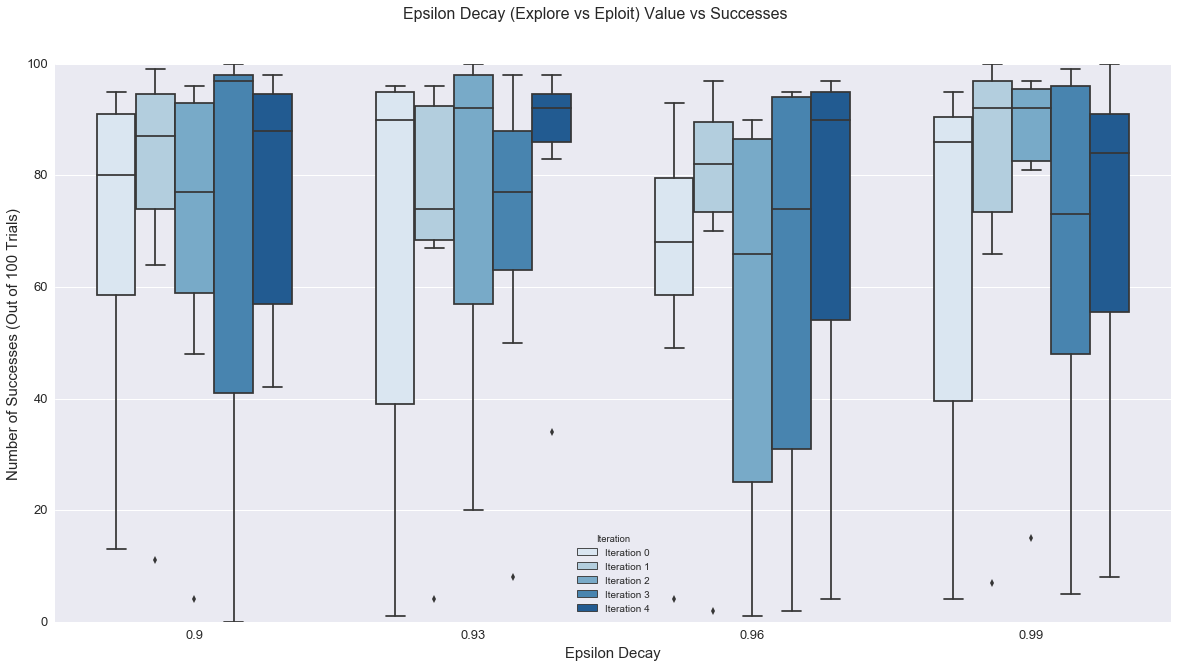

In [164]:
# Plot Epsilon Decay value effects 
plt.rcParams['figure.figsize'] = (20, 10)
plt.suptitle('Epsilon Decay (Explore vs Eploit) Value vs Successes', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax = sns.boxplot(y=stacked_frame['Successes'], x=stacked_frame['Epsilon_Decay'], hue=stacked_frame['Iteration'], 
            palette="Blues", width=0.7)
plt.ylabel('Number of Successes (Out of 100 Trials)', fontsize=15)
plt.xlabel('Epsilon Decay', fontsize=15)
plt.show()

Individual Epsilon Decay Values don't seem that important to the success of the Agent.  They Very drastically in performance but this is mostly driven by the Gamma Value. 